<a href="https://colab.research.google.com/github/yu828282/TIL/blob/master/AI/lotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lotto number prediction using deep learning model

In [1]:
# Install modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.0271 - loss: 0.6710 - val_accuracy: 0.0000e+00 - val_loss: 0.4150
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0237 - loss: 0.3262 - val_accuracy: 0.0190 - val_loss: 0.1941
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0235 - loss: 0.1860 - val_accuracy: 0.0190 - val_loss: 0.1654
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0220 - loss: 0.1622 - val_accuracy: 0.0190 - val_loss: 0.1512
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0239 - loss: 0.1495 - val_accuracy: 0.0190 - val_loss: 0.1399
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0253 - loss: 0.1380 - val_accuracy: 0.0292 - val_loss: 0.1309
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0215 - loss: 0.1309 - val_accuracy: 0.0307 - val_loss: 0.1245
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0229 - loss: 0.1253 - val_accuracy: 0.0307 - v

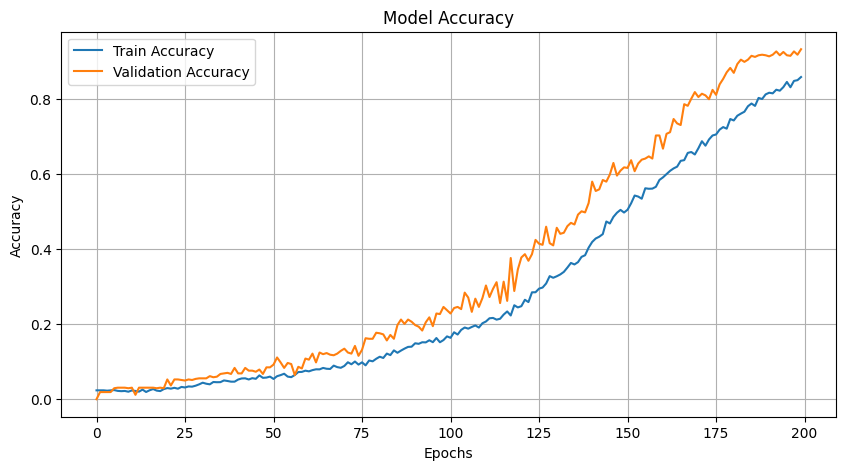

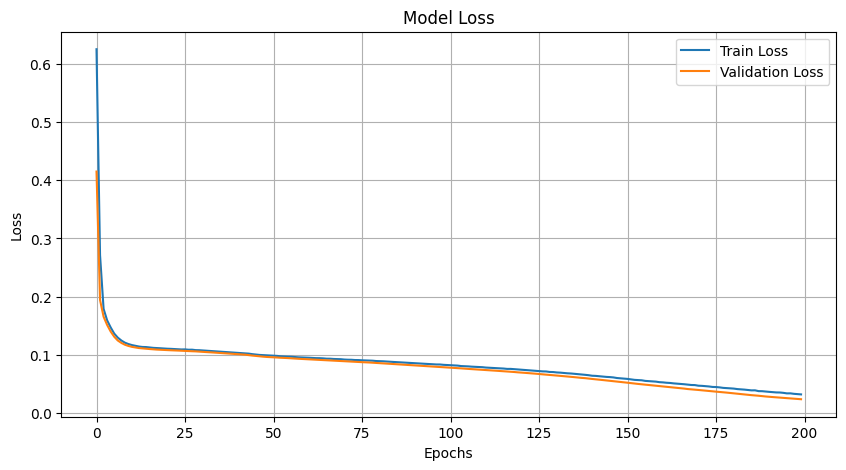

In [2]:
# Load CSV file
file_path = 'lotto.csv'
data = pd.read_csv(file_path, header=None)

# Convert to lotto number data
lotto_data = data.values.tolist()

# Set lotto number range (1 to 45) and number(6)
NUMBERS_RANGE = 45
LOTTO_NUM_COUNT = 6

# One-hot encoding
def one_hot_encode(data, num_classes):
    encoded = np.zeros((len(data), len(data[0]), num_classes))
    for i, row in enumerate(data):
        for j, num in enumerate(row):
            encoded[i, j, num - 1] = 1
    return encoded

encoded_data = one_hot_encode(lotto_data, NUMBERS_RANGE)

# Generate input (X) and output (Y) data
x = encoded_data[:, :, :] # Input data: All one-hot encoded lotto numbers
y = encoded_data[:, :, :] # Output data: All one-hot encoded lotto numbers

# Separate data for train/validation/test
train_size = int(0.8 * len(x))
val_size = int(0.1 * len(x))
x_train, x_val, x_test = x[:train_size], x[train_size:train_size + val_size], x[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# LSTM model definition
model = Sequential([
    LSTM(128, input_shape=(LOTTO_NUM_COUNT, NUMBERS_RANGE), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),  # return_sequences=True
    Dropout(0.2),
    Dense(NUMBERS_RANGE, activation='sigmoid')  # Probability output for each number range
])

# model compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model training
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=32, verbose=1)

# Test data evaluation
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict next number using last data
last_input = x_test[-1].reshape(1, LOTTO_NUM_COUNT, NUMBERS_RANGE)
predicted_output = model.predict(last_input).reshape(LOTTO_NUM_COUNT, NUMBERS_RANGE)

# Generate predicted numbers based on the maximum probability of each number
predicted_numbers = [np.argmax(pred) + 1 for pred in predicted_output]
print("The next lotto numbers are.... :", predicted_numbers)

# Generate training accuracy and loss graph
def plot_history(history):
    # Accuracy graph
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # loss graph
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# graph output
plot_history(history)
